


# Fixed Income and Credit
# Master in Computational Finance (MCF)

# 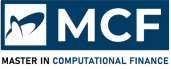

## Final Exam

**Professor**: N. Vasiljevic

## Bond Pricing

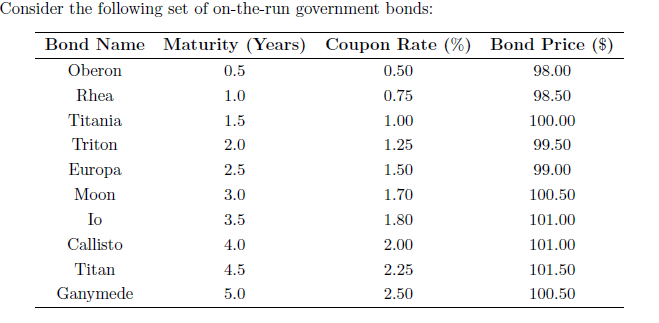

Importing libraries and initialization:

In [1]:
!pip install sympy==1.8.0
from sympy import *
from google.colab import files
from matplotlib import pyplot as plt
import numpy as np
import math

init_printing()

In [2]:
# Importing Bond_Utils.py
uploaded = files.upload()
import Bond_Utils as BU

Saving Bond_Utils.py to Bond_Utils.py


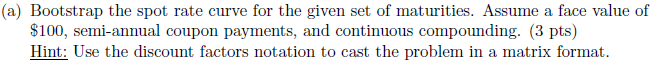

**Solution**

In the problem set, it is stated that coupon payment frequency is twice a year (semi-annually). Given bonds have different maturity periods (from 0.5 up to 5 years). This means that one cashflow time period will be 6 months (half year), therefore we introduce $N=10$ (Ganymede bond will have 10 cashflows).

Every bond from the list above has the face value $F=100 \$$.


Let's define matrix $P_{cb}$ that represents all bond prices given in the problem set: 

In [3]:
Pcb = Matrix([[98.0],[98.5],[100.0], [99.5], [99.0], [100.5], [101.0], [101.0], [101.5], [100.5]])
Pcb

⎡98.0 ⎤
⎢     ⎥
⎢98.5 ⎥
⎢     ⎥
⎢100.0⎥
⎢     ⎥
⎢99.5 ⎥
⎢     ⎥
⎢99.0 ⎥
⎢     ⎥
⎢100.5⎥
⎢     ⎥
⎢101.0⎥
⎢     ⎥
⎢101.0⎥
⎢     ⎥
⎢101.5⎥
⎢     ⎥
⎣100.5⎦

Now, let's define the full cashflow matrix $CF$ for all given bonds for every time period (coupon rates are expressed annually, so we will need to divide them by two for semi-annual coupon payment frequency):

In [4]:
CF = Matrix([[100.25, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0.375, 100.375, 0, 0, 0, 0, 0, 0, 0, 0],
            [0.5, 0.5, 100.5, 0, 0, 0, 0, 0, 0, 0],
            [0.625, 0.625, 0.625, 100.625, 0, 0, 0, 0, 0, 0],
            [0.75, 0.75, 0.75, 0.75, 100.75, 0, 0, 0, 0, 0],
            [0.85, 0.85, 0.85, 0.85, 0.85, 100.85, 0, 0, 0, 0],
            [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 100.9, 0, 0, 0],
            [1, 1, 1, 1, 1, 1, 1, 101, 0, 0],
            [1.125, 1.125, 1.125, 1.125, 1.125, 1.125, 1.125, 1.125, 101.125, 0],
            [1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 101.25]])
CF

⎡100.25     0       0       0       0       0       0      0       0       0  
⎢                                                                             
⎢0.375   100.375    0       0       0       0       0      0       0       0  
⎢                                                                             
⎢ 0.5      0.5    100.5     0       0       0       0      0       0       0  
⎢                                                                             
⎢0.625    0.625   0.625  100.625    0       0       0      0       0       0  
⎢                                                                             
⎢ 0.75    0.75    0.75    0.75    100.75    0       0      0       0       0  
⎢                                                                             
⎢ 0.85    0.85    0.85    0.85     0.85   100.85    0      0       0       0  
⎢                                                                             
⎢ 0.9      0.9     0.9     0.9     0.9     0.9    10

In order to bootstrap the sport rate curve, instead of working with sport rates directly, we will simplify it by using zero-coupon bond prices for every maturity period $B(0,t)$ (e.g. with face value of $1).

It is clearly stated that we shoud use continious compound interest. Therefore, the zero-coupon bond price is:

$B(0,t) = \frac {1}{e^{r_{0,t} \frac {t}{2}}}$

Let's define new matrix of zero-coupon bond prices $P_{zcb}$:

In [5]:
B0_1, B0_2, B0_3, B0_4, B0_5, B0_6, B0_7, B0_8, B0_9, B0_10 = symbols('B(0\,1), B(0\,2), B(0\,3), B(0\,4), B(0\,5), B(0\,6), B(0\,7), B(0\,8), B(0\,9), B(0\,10)')
Pzcb = Matrix([B0_1, B0_2, B0_3, B0_4, B0_5, B0_6, B0_7, B0_8, B0_9, B0_10])
Pzcb

⎡B(0,1) ⎤
⎢       ⎥
⎢B(0,2) ⎥
⎢       ⎥
⎢B(0,3) ⎥
⎢       ⎥
⎢B(0,4) ⎥
⎢       ⎥
⎢B(0,5) ⎥
⎢       ⎥
⎢B(0,6) ⎥
⎢       ⎥
⎢B(0,7) ⎥
⎢       ⎥
⎢B(0,8) ⎥
⎢       ⎥
⎢B(0,9) ⎥
⎢       ⎥
⎣B(0,10)⎦

We can represent system of equations using the matrix form:

In [6]:
Eq(Pcb, MatMul(CF,Pzcb))

⎡98.0 ⎤   ⎡100.25     0       0       0       0       0       0      0       0
⎢     ⎥   ⎢                                                                   
⎢98.5 ⎥   ⎢0.375   100.375    0       0       0       0       0      0       0
⎢     ⎥   ⎢                                                                   
⎢100.0⎥   ⎢ 0.5      0.5    100.5     0       0       0       0      0       0
⎢     ⎥   ⎢                                                                   
⎢99.5 ⎥   ⎢0.625    0.625   0.625  100.625    0       0       0      0       0
⎢     ⎥   ⎢                                                                   
⎢99.0 ⎥   ⎢ 0.75    0.75    0.75    0.75    100.75    0       0      0       0
⎢     ⎥ = ⎢                                                                   
⎢100.5⎥   ⎢ 0.85    0.85    0.85    0.85     0.85   100.85    0      0       0
⎢     ⎥   ⎢                                                                   
⎢101.0⎥   ⎢ 0.9      0.9     0.9     0.9     0.9    

Solving the system of equations with 10 variables (zero-coupon bond prices):

In [7]:
Pzcb_solved = (CF**-1)*(Pcb)
Eq(Pzcb, Pzcb_solved)

⎡B(0,1) ⎤   ⎡0.977556109725686⎤
⎢       ⎥   ⎢                 ⎥
⎢B(0,2) ⎥   ⎢0.977667909926305⎥
⎢       ⎥   ⎢                 ⎥
⎢B(0,3) ⎥   ⎢0.985297392937055⎥
⎢       ⎥   ⎢                 ⎥
⎢B(0,4) ⎥   ⎢0.97055576762367 ⎥
⎢       ⎥   ⎢                 ⎥
⎢B(0,5) ⎥   ⎢0.953515554489731⎥
⎢       ⎥ = ⎢                 ⎥
⎢B(0,6) ⎥   ⎢0.955528965547872⎥
⎢       ⎥   ⎢                 ⎥
⎢B(0,7) ⎥   ⎢0.949077209809462⎥
⎢       ⎥   ⎢                 ⎥
⎢B(0,8) ⎥   ⎢0.932978228613269⎥
⎢       ⎥   ⎢                 ⎥
⎢B(0,9) ⎥   ⎢0.918022751238495⎥
⎢       ⎥   ⎢                 ⎥
⎣B(0,10)⎦   ⎣0.886170371729487⎦

We can calculate the spot values now:

$r_{0,t} = \frac {2ln (\frac {1} {B(0,t)})} {t}$

In [8]:
Pzcb_solved = np.array(Pzcb_solved) # converting to numpy array
r0 = [2*math.log(1/Pzcb_solved[i])/(i+1) for i in range(len(Pzcb_solved))]
r0

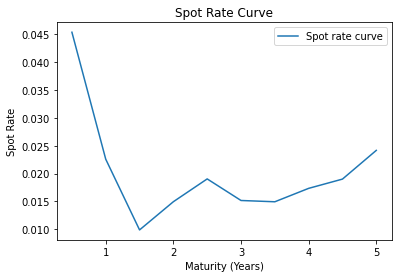

In [9]:
plt.plot(np.arange(0.5, 5.5, 0.5),r0, label='Spot rate curve')
plt.title("Spot Rate Curve")
plt.xlabel("Maturity (Years)")
plt.ylabel("Spot Rate")
plt.legend()
plt.show()

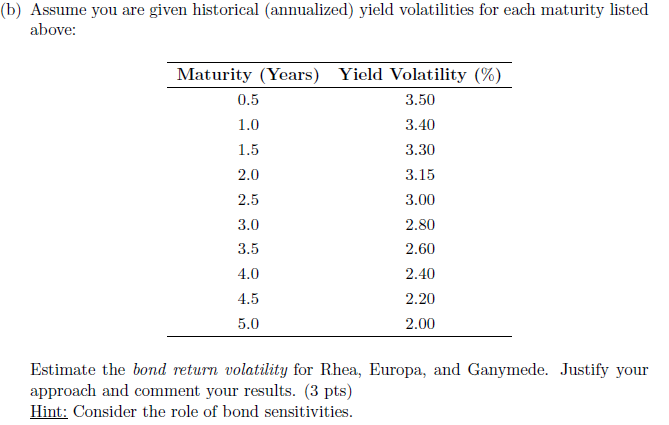

**Solution**

In order to estimate the *bond return volatility* for *Rhea*, *Europa* and *Ganymede*, we need to respect this equation:

$return = -D_{mod} \cdot \Delta Y_m$

where $return$ and $\Delta Y_m$ are expressed in percent.

$D_{mod}$ is the modified duration of the bond

$\Delta Y_m$ is the yield volatility

In [10]:
# Let's instantiate bonds that is defined in the Bond_Utils.py module

rhea = BU.Bond(100, 0.75, 1, 2, "Rhea", -1)
europa = BU.Bond(100, 1.50, 1, 2, "Europa", -1)
ganymede = BU.Bond(100, 2.50, 1, 2, "Ganymede", -1)


In [11]:
# Yield volatilities
dy_rhea = 3.40
dy_europa = 3.00
dy_ganymede = 2.00

Let's calculate YTM for all three bonds:

In [12]:
# Rhea YTM
coupon_rhea = 0.0075/2 * 100
fv_rhea = 100
price_rhea = 98.5

ytm_rhea = Symbol('y')
equation = (coupon_rhea*exp(-ytm_rhea*0.5)+
            coupon_rhea*exp(-ytm_rhea*1.0)+
            fv_rhea*exp(-ytm_rhea*1.0)-price_rhea)

y_rhea= solve(equation, ytm_rhea)
y_rhea[0]

In [13]:
# Europa YTM
coupon_europa = 0.015/2 * 100
fv_europa = 100
price_europa = 99

ytm_europa = Symbol('y')
equation = (coupon_europa*exp(-ytm_europa*0.5)+
            coupon_europa*exp(-ytm_europa*1)+
            coupon_europa*exp(-ytm_europa*1.5)+
            coupon_europa*exp(-ytm_europa*2)+
            coupon_europa*exp(-ytm_europa*2.5)+
            fv_europa*exp(-ytm_europa*2.5)-price_europa)

y_europa= solve(equation, ytm_europa)
y_europa[0]

In [14]:
# Ganymede YTM
coupon_ganymede = 0.025/2 * 100
fv_ganymede = 100
price_ganymede = 100.5

ytm_ganymede = Symbol('y')
equation = (coupon_ganymede*exp(-ytm_ganymede*0.5)+
            coupon_ganymede*exp(-ytm_ganymede*1)+
            coupon_ganymede*exp(-ytm_ganymede*1.5)+
            coupon_ganymede*exp(-ytm_ganymede*2)+
            coupon_ganymede*exp(-ytm_ganymede*2.5)+
            coupon_ganymede*exp(-ytm_ganymede*3.0)+
            coupon_ganymede*exp(-ytm_ganymede*3.5)+
            coupon_ganymede*exp(-ytm_ganymede*4.0)+
            coupon_ganymede*exp(-ytm_ganymede*4.5)+
            coupon_ganymede*exp(-ytm_ganymede*5.0)+
            fv_ganymede*exp(-ytm_ganymede*5.0)-price_ganymede)

y_ganymede= solve(equation, ytm_ganymede)
y_ganymede[0]

Now, we need to calculate modified durations for all three bonds:

In [15]:
# MD for Rhea
md_rhea = rhea.duration(float(y_rhea[0]), 'modified')
md_rhea

In [16]:
# MD for Europa
md_europa = europa.duration(float(y_europa[0]), 'modified')
md_europa

In [17]:
# MD for Ganymede
md_ganymede = ganymede.duration(float(y_ganymede[0]), 'modified')
md_europa

And finally, let's see the bond return volatilities:

In [18]:
# Bond return volatility for Rhea
md_rhea*dy_rhea

In [19]:
# Bond return volatility for Europa
md_europa*dy_europa

In [20]:
# Bond return volatility for Ganymede
md_ganymede*dy_ganymede

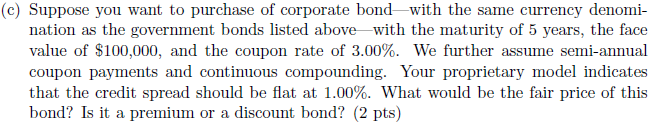

**Solution**

In this problem set, we have a corporate bond. It has the maturity of 5 years, $F=100000 \$$, and coupon rate of 3% (semi-annual payment).

In order to calculate fair price, we need to calculate Yield To Maturity (YTM) for this bond. However, we don't have it as a given parameter, but we have a credit spread which is flat at 1%. This means that:

$Credit\space Spread = Corporate\space Bond\space Yield - Government\space Bond\space Yield$

Based on the formula above, we have to calculate the yield of the government bond with same maturity date. That is **Ganymede** bond.


In [21]:
# Note: we have calculated YTM for Ganymede bond in b)
y_ganymede[0]

Now we have the yield (YTM) for our corprorate bond:

In [22]:
credit_spread = 0.01
ytm_cb = y_ganymede[0] + credit_spread
ytm_cb

Let's calculate the fair price of our corporative bond:

In [23]:
fv_cb = 100000
coupon_cb = 0.03/2 * fv_cb
price_cb = coupon_cb*math.exp(-ytm_cb*0.5) +\
           coupon_cb*math.exp(-ytm_cb*1.0) +\
           coupon_cb*math.exp(-ytm_cb*1.5) +\
           coupon_cb*math.exp(-ytm_cb*2.0) +\
           coupon_cb*math.exp(-ytm_cb*2.5) +\
           coupon_cb*math.exp(-ytm_cb*3.0) +\
           coupon_cb*math.exp(-ytm_cb*3.5) +\
           coupon_cb*math.exp(-ytm_cb*4.0) +\
           coupon_cb*math.exp(-ytm_cb*4.5) +\
           coupon_cb*math.exp(-ytm_cb*5.0) +\
           fv_cb*math.exp(-ytm_cb*5.0)

price_cb

This is a **discount** bond as its market value (98139.74) is below its face value (100000).